## Metrics

We will only focus on supervised. The reason for this is because supervised
problems are in abundance compared to un-supervised, and evaluation of
unsupervised methods is quite subjective.

If we talk about **classification** problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply
AUC (AUC)
- Log loss
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)

When it comes to **regression**, the most commonly used evaluation metrics are:
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- $R^2$

**Binary Classification:** When we have an equal number of positive and negative samples in a binary
classification metric, we generally use accuracy, precision, recall and F1 score.

When the dataset is skewed, i.e. 180 positive and 30 negative, is better uuse **precision**.

- True Positive: predict the correct positive target
- True Negative: predict the correct negative target
- False Positive: predict positive but target is negative
- False Negative: predict negative but target is positive

In [5]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :retutn: number of positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true,y_pred):
        if yt == 1 and yp ==1:
            tp +=1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :retutn: number of negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true,y_pred):
        if yt == 0 and yp == 0:
            tn +=1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :retutn: number of fasle positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true,y_pred):
        if yt == 0 and yp == 1:
            fp +=1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negative
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :retutn: number of false negative
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true,y_pred):
        if yt == 1 and yp == 0:
            fn +=1
    return fn

In [6]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(true_positive(l1, l2))
print(true_negative(l1, l2))
print(false_positive(l1, l2))
print(false_negative(l1, l2))

2
3
1
2



$$Accuracy = (TP+TN)/(TP+TN+FP+FN)$$
    


In [8]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    
    return accuracy_score

In [11]:
#Using our function
print(accuracy_v2(l1, l2))

from sklearn import metrics
# using sklearn
print(metrics.accuracy_score(l1, l2))

0.625
0.625


$$Precision = TP / (TP+FP)$$

Let’s say we make a new model on the new skewed dataset and our model correctly
identified 80 non-pneumothorax out of 90 and 8 pneumothorax out of 10. 

Thus, we identify 88 images out of 100 successfully. The **accuracy is**, therefore, 0.88 or 88%.

But, out of these 100 samples, 10 non-pneumothorax images are misclassified as
having pneumothorax and 2 pneumothorax are misclassified as not having pneumothorax.
Thus, we have:
- TP : 8
- TN: 80
- FP: 10
- FN: 2

So, our **precision is** 8 / (8 + 10) = 0.444. This means our model is correct 44.4%
times when it’s trying to identify positive samples (pneumothorax).

In [33]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    
    return precision

In [35]:
precision(l1, l2)

0.6666666666666666

$$Recall = TP / (TP + FN)$$

In the above case recall is 8 / (8 + 2) = 0.80. This means our model identified 80%
of positive samples correctly.

Recall is also know as **Sensivity** or True Positive Rate .

In [32]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
                   
    return recall

In [17]:
recall(l1, l2)

0.5

**For a “good” model, our precision and recall values should be high.**

## Precision Recall curve
Most of the models predict a probability, and when we predict, we usually choose
this threshold to be 0.5. This threshold is not always ideal, and depending on this
threshold, your value of precision and recall can change drastically. If for every
threshold we choose, we calculate the precision and recall values, we can create a
plot between these sets of values. This plot or curve is known as the precision-recall
curve.

In [30]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

So, y_true is our targets, and y_pred is the probability values for a sample being
assigned a value of 1. So, now, we look at probabilities in prediction instead of the
predicted value (which is most of the time calculated with a threshold at 0.5).

Text(0, 0.5, 'Precision')

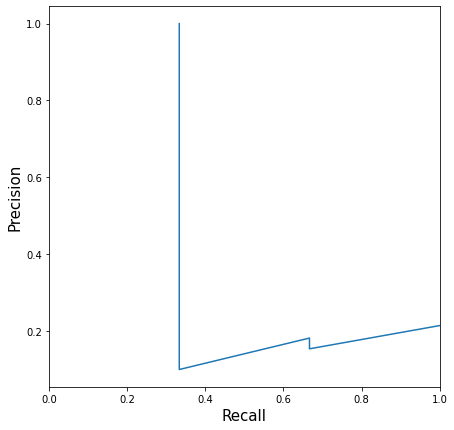

In [38]:
import matplotlib.pyplot as plt

precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273, 
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]

# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for threshold in thresholds:
    temp_prediction = [1 if prediction >= threshold else 0 for prediction in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)
    
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlim(0,1.0)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

You will notice that it’s **challenging to choose a value of threshold that gives both
good precision and recall values**. If the threshold is too high, you have a smaller
number of true positives and a high number of false negatives. This decreases your
recall; however, your precision score will be high. If you reduce the threshold too
low, false positives will increase a lot, and precision will be less.


**F1 score** is a metric that combines both precision and recall.

$$F1 = 2PR / (P+R)$$

In [39]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    
    return score

In [42]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [45]:
print(f1(y_true, y_pred))

print(metrics.f1_score(y_true, y_pred))

0.5714285714285715
0.5714285714285715


**A perfect prediction model** has an F1 of 1. When dealing with datasets that have
**skewed targets**, we should **look at F1** (or precision and recall) instead of accuracy.


- **True Positive Rate** is **Sensivity**
- **False Negative Rate** is **Specificity** that is 1-FPR

- False Positive Rate 
$$FPR= FP/(TN+FP)$$

In [46]:
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)

    return fp / (tn + fp)

In [48]:
# empty lists to store tpr and fpr values
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]

# We train a model like the random forest, 
# and we can get the probability of when a sample is positive
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if predictions >= thresh else 0 for predictions in y_pred]

    # calculate tpr
    temp_tpr = recall(y_true, temp_pred)

    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)

    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [54]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.column_stack([thresholds,tpr_list,fpr_list]), columns=['threshold','tpr','fpr'])
df

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


To obtain the Receiver Operating Characteristic (**ROC**) all we need is plot values. The Area Under Curve or
just simply **AUC** is used very often when you have a dataset which has skewed binary targets.

AUC values range from 0 to 1.
- AUC = 1 implies you have a perfect model. Most of the time, it means that
you made some mistake with validation and should revisit data processing
and validation pipeline of yours. If you didn’t make any mistakes, then
congratulations, you have the best model one can have for the dataset you
built it on.
- AUC = 0 implies that your model is very bad (or very good!). Try inverting
the probabilities for the predictions, for example, if your probability for the
positive class is p, try substituting it with 1-p. This kind of AUC may also
mean that there is some problem with your validation or data processing.
- AUC = 0.5 implies that your predictions are random. So, for any binary
classification problem, if I predict all targets as 0.5, I will get an AUC of
0.5.

`metrics.roc_auc_score(y_ture_y_pred)`

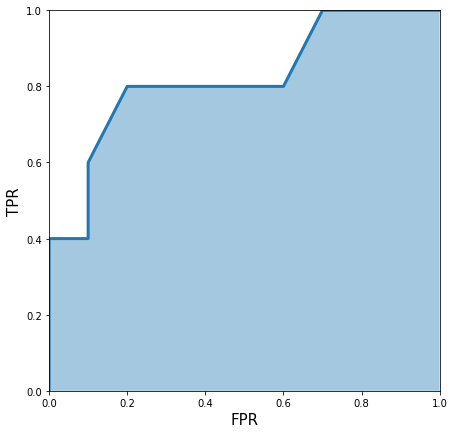

In [55]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

**But what does AUC say about our model?**

Suppose you get an AUC of 0.85 when you build a model to detect pneumothorax
from chest x-ray images. This means that if you select a random image from your
dataset with pneumothorax (positive sample) and another random image without
pneumothorax (negative sample), then the pneumothorax image will rank higher
than a non-pneumothorax image with a probability of 0.85.


After calculating probabilities and AUC, you would want to make predictions on
the test set. Depending on the problem and use-case, you might want to either have
probabilities or actual classes. **If you want to have probabilities**, it’s effortless. You
already have them. If you want to have classes, you need to select a threshold. In
the case of binary classification, you can do something like the following.

- Prediction = Probability >= Threshold

Which means, that prediction is a new list which contains only binary variables. An
item in prediction is 1 if the probability is greater than or equal to a given threshold
else the value is 0.

And guess what, you can use the ROC curve to choose this threshold! The ROC
curve will tell you how the threshold impacts false positive rate and true positive
rate and thus, in turn, false positives and true positives. 

You should choose the
threshold that is best suited for your problem and datasets.
For example, **if you don’t want to have too many false positives**, you should have a
high threshold value. This will, however, also give you a lot more false negatives.

Observe the trade-off and select the best threshold. Let’s see how these thresholds
impact true positive and false positive values.

In [61]:
# empty lists to store true positive
# and false positive values
tp_list = []
fp_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]

# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:

    # calculate predictions for a given threshold
    temp_pred = [1 if probability >= thresh else 0 for probability in y_pred]

    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)

    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)

    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)
    
df = pd.DataFrame(np.column_stack([thresholds,tp_list,fp_list]), columns=['threshold','tp','fp'])
df

,threshold,tp,fp
0,0.00,5.0,10.0
1,0.10,5.0,9.0
2,0.20,5.0,7.0
3,0.30,4.0,6.0
4,0.40,4.0,3.0
5,0.50,4.0,3.0
6,0.60,4.0,2.0
7,0.70,3.0,1.0
8,0.80,3.0,1.0
9,0.85,2.0,1.0


Most of the time, the top-left value on ROC curve should give you a quite good
threshold.

Comparing the table and the ROC curve, we see that a threshold of around 0.8 is
quite good where we do not lose a lot of true positives and neither we have a lot of
false positives.

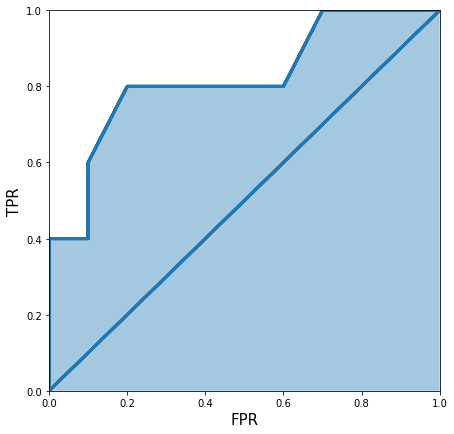

In [72]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

**Log Loss** is used for Binary Classification.

$$ Log Loss = - 1.0 \times ( target \times log(prediction) + (1 - target) \times log(1 - prediction) ) $$

Where target is either 0 or 1 and prediction is a probability of a sample belonging
to class 1.

For **multiple samples** in the dataset, the log-loss over all samples is a mere average
of all individual log losses. 

**One thing to remember** is that log loss penalizes quite
high for an incorrect or a far-off prediction, i.e. log loss punishes you for being very
sure and very wrong.

In [77]:
import numpy as np

def log_loss(y_true,y_proba):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    
    # initialize empty list to store
    # individual losses
    loss = []
    
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        # Why? Think about it! answer: log(x) for x>0
        
        # np.clip ->  For example, if an interval of [0, 1] 
        #is specified, values smaller than 0 become 0, and values larger than 1 become 1.
        yp = np.clip(yp, epsilon, 1 - epsilon)

        # calculate loss for one sample
        temp_loss = - 1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
        
        # add to loss list
        loss.append(temp_loss)

    # return mean loss over all samples
    return np.mean(loss)
        

In [80]:
y_true = [0, 0, 0, 0, 1,
          0, 1, 0, 0, 1,
          0, 1, 0, 0, 1]

y_proba = [0.1, 0.3, 0.2, 0.6, 0.8,
           0.05, 0.9, 0.5, 0.3, 0.66,
           0.3, 0.2, 0.85, 0.15, 0.99]

print('our function: ', log_loss(y_true, y_proba))

print('sklearn metrics: ', metrics.log_loss(y_true, y_proba))

our function:  0.49882711861432294
sklearn metrics:  0.49882711861432294


So, when dealing with log loss, you need to be very careful; 
**any non-confident prediction will have a very high log loss.**